In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [4]:
import pandas as pd

# Define file paths
file1_path = '../Data/TorrTrials/arp/combinedResult.csv'
file2_path = '../Data/TorrTrials/Dhruv/combinedResult.csv'
file3_path = '../Data/TorrTrials/Prasanna/combinedResult.csv'
file4_path = '../Data/TorrTrials/rnk/combinedResult.csv'

# Read each CSV file into a DataFrame
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)
data3 = pd.read_csv(file3_path)
data4 = pd.read_csv(file4_path)

# Combine all DataFrames
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Save the combined data to a new CSV file
# combined_data.to_csv('combined_file.csv', index=False)  # Replace 'combined_file.csv' with your desired output name


In [2]:
PATH = "../Data/exp_2/combinedResult.csv"

def load_data(csv_path=PATH):
    return pd.read_csv(csv_path)

In [5]:
# data = load_data()
data = combined_data
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [116]:
##### removing zero values so that data is not scattered highly

data = data[data['s'] != 0]

# Display the first few rows of the filtered dataset
data.head()



,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currTime  6494 non-null   int64  
 1   s1        6494 non-null   float64
 2   s2        6494 non-null   float64
 3   s3        6494 non-null   float64
 4   s4        6494 non-null   float64
 5   s         6494 non-null   float64
 6   AccX      6494 non-null   float64
 7   AccY      6494 non-null   float64
 8   AccZ      6494 non-null   float64
 9   GyroX     6494 non-null   float64
 10  GyroY     6494 non-null   float64
 11  GyroZ     6494 non-null   float64
 12  Frame     6494 non-null   int64  
 13  SubFrame  6494 non-null   int64  
 14  Fx        6494 non-null   float64
 15  Fy        6494 non-null   float64
 16  Fz        6494 non-null   float64
 17  Mx        6494 non-null   float64
 18  My        6494 non-null   float64
 19  Mz        6494 non-null   float64
 20  Cx        6494 non-null   floa

In [103]:
data.describe()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,...,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.0,6494.000000
mean,42478.162304,798.839570,767.355561,755.075705,761.635119,770.726475,-39.340556,-887.911719,507.209729,-0.393395,...,32.609892,-1.767073,-326.272791,18195.855309,-20523.973121,1015.851738,-62.227012,-56.807272,0.0,65.643671
std,16466.561283,12.492602,2.750117,2.059243,5.366092,3.082478,24.665973,39.858541,65.100554,6.231987,...,20.733223,7.463278,67.481084,10187.817639,19786.718716,2232.150024,57.011231,30.907652,0.0,6.321675
min,13914.000000,750.770000,758.270000,751.840000,753.960000,754.510000,-374.510000,-1430.660000,265.620000,-180.430000,...,-26.232000,-34.795500,-711.927000,-8657.090000,-81265.500000,-6480.760000,-256.289000,-145.490000,0.0,56.000000
25%,28786.500000,791.062500,765.740000,753.320000,757.100000,769.010000,-51.760000,-924.800000,433.110000,-2.390000,...,20.174600,-5.269228,-352.863500,12132.600000,-37066.275000,-261.720000,-116.701000,-80.159650,0.0,60.000000
50%,41315.000000,798.360000,767.170000,754.350000,760.040000,770.580000,-41.500000,-880.860000,526.370000,-0.370000,...,33.522300,-1.802515,-323.367000,17382.500000,-23766.550000,1145.560000,-101.290000,-53.647250,0.0,70.000000
75%,54611.000000,806.017500,769.160000,757.150000,765.970000,772.360000,-27.340000,-858.400000,559.570000,1.670000,...,43.713475,1.561255,-293.098250,23788.575000,-2504.342500,2541.157500,-8.323935,-36.644275,0.0,70.000000
max,82042.000000,870.050000,775.790000,761.170000,783.240000,789.590000,493.160000,-704.590000,754.390000,59.560000,...,148.622000,99.068100,0.000000,57636.600000,10396.900000,10820.800000,24.785100,30.352400,0.0,72.000000


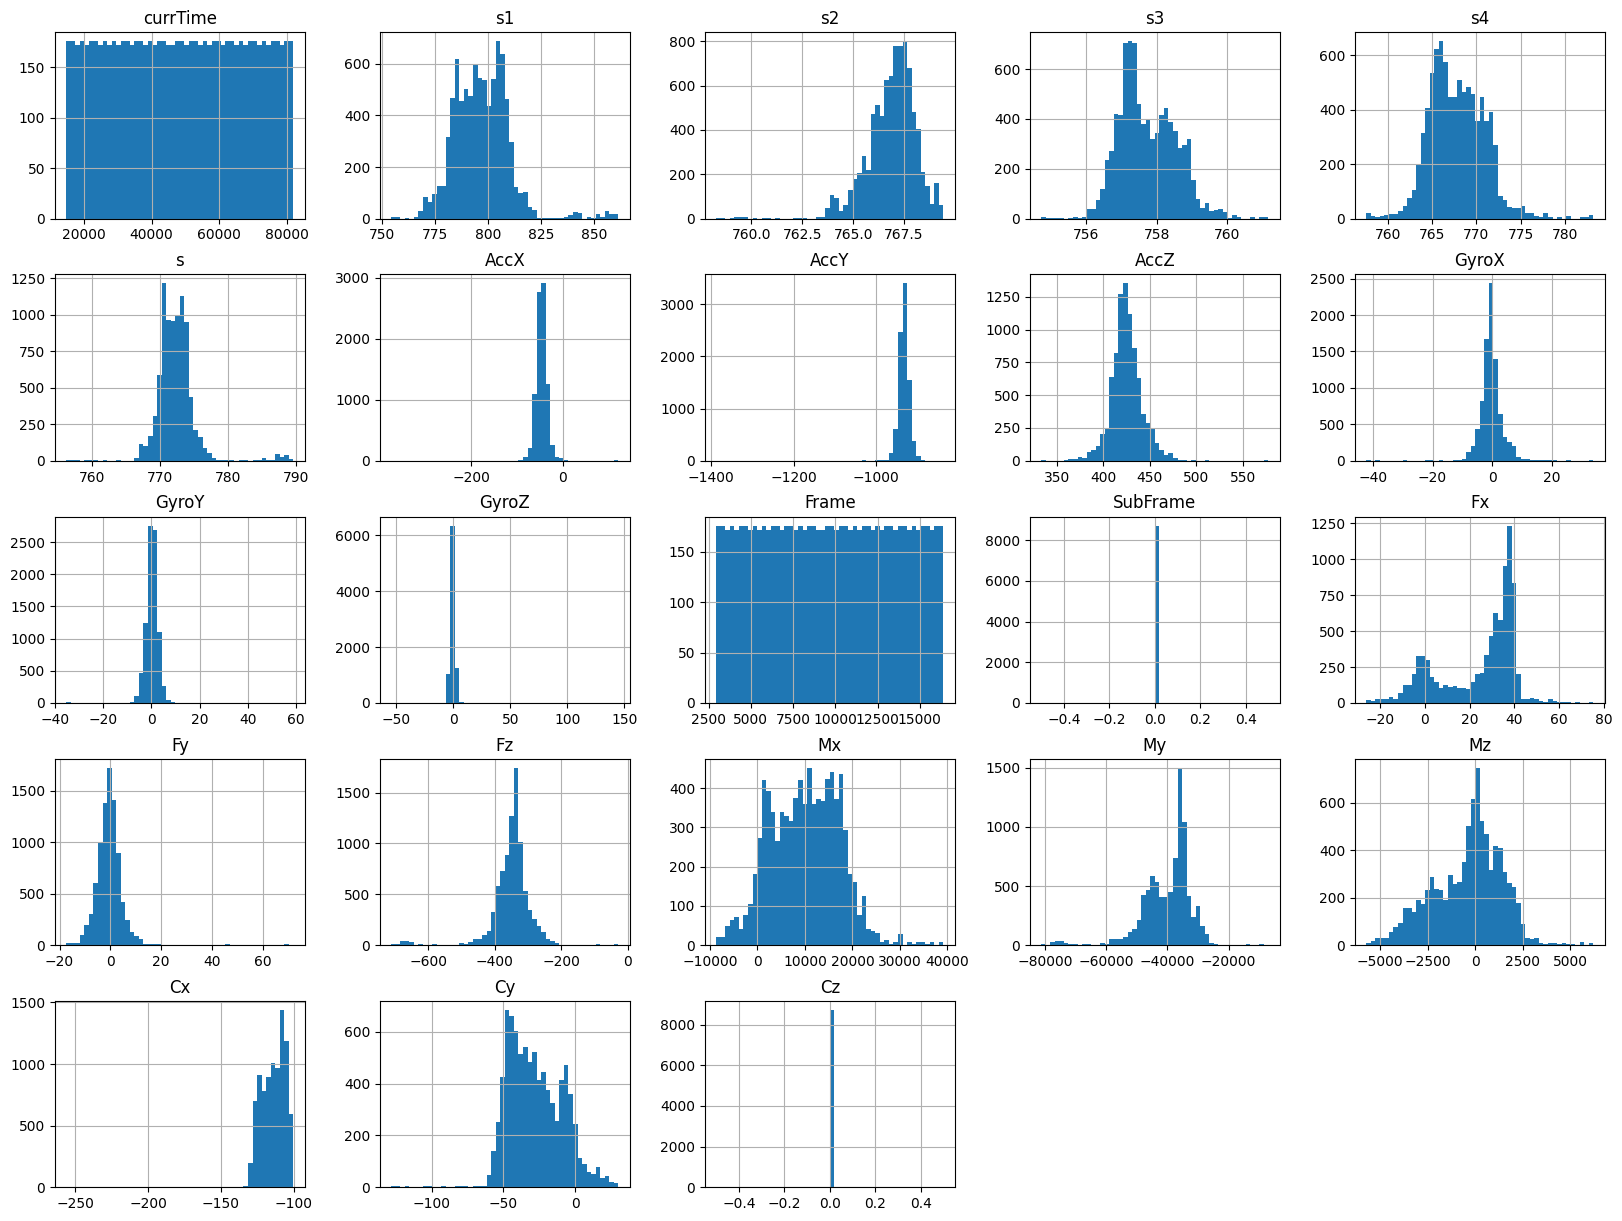

In [9]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
data_labels = data["Fz"]
data.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,0,5.19443,-6.451870,3507.19,-6999.14,2351.19,-256.2890,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,0,4.58888,-8.338240,4662.49,-8587.69,2404.75,-218.7690,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,0,3.95106,-9.704820,5343.89,-9834.87,2809.59,-191.9220,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,0,6.34752,-6.923790,5218.11,-10957.00,2539.79,-168.9350,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,0,10.56410,-0.225128,5438.89,-12976.90,2298.55,-151.2180,-63.3728,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,68262,826.73,769.61,753.24,757.89,776.87,-26.37,-904.79,511.23,-21.25,...,0,61.99030,94.222200,47072.10,-10015.90,6028.69,-20.5794,-96.7177,0,60
6490,68293,810.97,767.08,752.81,755.64,771.63,-35.64,-939.45,442.38,-67.66,...,0,59.64420,99.068100,44399.00,-9447.16,5669.16,-20.8284,-97.8877,0,60
6491,68324,781.51,762.04,752.79,754.97,762.83,401.37,-1300.29,631.35,-180.43,...,0,50.07000,88.532300,38823.40,-8443.56,4605.61,-22.2958,-102.5160,0,60
6492,68355,759.49,760.21,752.78,754.89,756.84,493.16,-1430.66,713.87,25.69,...,0,27.88060,53.736700,26741.10,-6761.62,2984.31,-29.5444,-116.8370,0,60


In [7]:
data.columns

Index(['currTime', 's1', 's2', 's3', 's4', 's', 'AccX', 'AccY', 'AccZ',
       'GyroX', 'GyroY', 'GyroZ', 'Frame', 'SubFrame', 'Fx', 'Fy', 'Fz', 'Mx',
       'My', 'Mz', 'Cx', 'Cy', 'Cz', 'Weight'],
      dtype='object')

Dimensionality Reduction for better performance

In [8]:
data = data.drop(["s", "currTime","SubFrame", "Frame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz"], axis=1)
data.head()

,s1,s2,s3,s4,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Weight
0,754.18,758.27,754.73,757.57,-215.82,-1025.88,333.01,0.34,-34.50,-54.49,70
1,755.85,758.69,754.79,758.29,-35.64,-990.72,399.90,33.84,-35.31,-52.63,70
2,758.30,759.12,754.98,758.66,109.86,-835.45,577.64,12.05,-6.95,-5.08,70
3,761.97,759.41,755.08,759.25,-91.80,-945.80,397.46,18.98,-16.66,-5.27,70
4,765.97,759.53,755.19,759.81,-111.33,-989.75,360.84,15.03,-3.83,-0.82,70


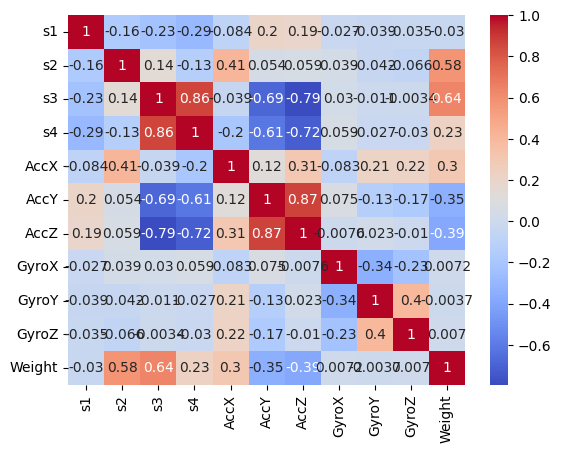

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your dataset
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
threshold = 0.8
high_corr_pairs = []

for column in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, column]) > threshold and row != column:
            high_corr_pairs.append((row, column, corr_matrix.loc[row, column]))

# Print pairs with high correlation
if high_corr_pairs:
    print("\nHighly correlated pairs (correlation > 0.8 or < -0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("\nNo highly correlated pairs (correlation > 0.8 or < -0.8) found.")

NameError: name 'corr_matrix' is not defined

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2,
random_state=42)

train_labels, test_labels = train_test_split(data_labels,test_size=0.2,
random_state=42 )
## random_state ensures that same indices of split is produced every time

Standard correlation coefficiant tells the correlation between the desired vairbles with other vairables in the data set and gives insight of how a specific variable is related to the desired variable

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with only the StandardScaler step
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the numerical data

In [12]:
train_data_scaled = num_pipeline.fit_transform(train_set)
test_data_scaled = num_pipeline.fit_transform(test_set)

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_scaled, train_labels)

LinearRegression()

In [15]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [-310.69825398 -366.32015972 -349.2469726  -301.29135522 -302.265699  ]


In [16]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(train_data_scaled)
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

23.447224664562174

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, train_labels)

DecisionTreeRegressor()

In [19]:
import numpy as  np
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(train_data_scaled)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


284.61893015211695

In [20]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data_scaled, train_labels)

RandomForestRegressor()

In [21]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", forest_reg.predict(some_data_prepared))

In [22]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [23]:
predictions = forest_reg.predict(train_data_scaled)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

7.003985876411774

In [24]:
from sklearn.svm import SVR


print("\n--- Support Vector Regressor (SVR) ---")
svr_model = SVR(kernel='rbf')
svr_model.fit(train_data_scaled, train_labels)  # Use scaled data for SVR


--- Support Vector Regressor (SVR) ---


SVR()

In [25]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", svr_model.predict(some_data_prepared))

In [26]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [27]:
predictions = svr_model.predict(train_data_scaled)
svr_mse = mean_squared_error(train_labels, predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

44.001636083389954

In [28]:
print("Linear Reg:", lin_reg.predict(some_data_prepared))
print("Decision tree:", tree_reg.predict(some_data_prepared))
print("random forest:", forest_reg.predict(some_data_prepared))
print("svr:", svr_model.predict(some_data_prepared),"\n\n")

print("Actual:", list(some_labels))

Linear Reg: [-310.69825398 -366.32015972 -349.2469726  -301.29135522 -302.265699  ]
Decision tree: [-49.4308 -49.4308 -49.4308 -49.4308 -49.4308]
random forest: [-323.55406 -396.88833 -334.58819 -284.28238 -290.81183]
svr: [-328.42512968 -369.77594188 -344.55674092 -317.58567904 -309.62799472] 


Actual: [-357.467, -389.664, -374.18, -292.876, -330.241]


c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [29]:
some_data = test_set.iloc[:5]
some_labels = test_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", svr_model.predict(some_data_prepared))

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming `y_test` is your actual values and you have predictions from each model
# e.g., lin_pred, tree_pred, forest_pred, svr_pred

# Calculate RMSE
lin_rmse = np.sqrt(mean_squared_error(some_labels, lin_reg.predict(some_data_prepared)))
tree_rmse = np.sqrt(mean_squared_error(some_labels, tree_reg.predict(some_data_prepared)))
forest_rmse = np.sqrt(mean_squared_error(some_labels, forest_reg.predict(some_data_prepared)))
svr_rmse = np.sqrt(mean_squared_error(some_labels, svr_model.predict(some_data_prepared)))

# Calculate R-squared as a measure of accuracy
lin_r2 = r2_score(some_labels, lin_reg.predict(some_data_prepared))
tree_r2 = r2_score(some_labels, tree_reg.predict(some_data_prepared))
forest_r2 = r2_score(some_labels, forest_reg.predict(some_data_prepared))
svr_r2 = r2_score(some_labels, svr_model.predict(some_data_prepared))

# Print RMSE and R-squared as accuracy percentage
print("Linear Regression RMSE:", lin_rmse, " | Accuracy:", lin_r2 * 100, "%")
print("Decision Tree RMSE:", tree_rmse, " | Accuracy:", tree_r2 * 100, "%")
print("Random Forest RMSE:", forest_rmse, " | Accuracy:", forest_r2 * 100, "%")
print("SVR RMSE:", svr_rmse, " | Accuracy:", svr_r2 * 100, "%\n")


Linear Regression RMSE: 24.360555094898412  | Accuracy: 83.39319683662289 %
Decision Tree RMSE: 263.3851905075151  | Accuracy: -1841.3077207640285 %
Random Forest RMSE: 26.985854657853302  | Accuracy: 79.62094545538467 %
SVR RMSE: 33.405510664028924  | Accuracy: 68.77173126825102 %



c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


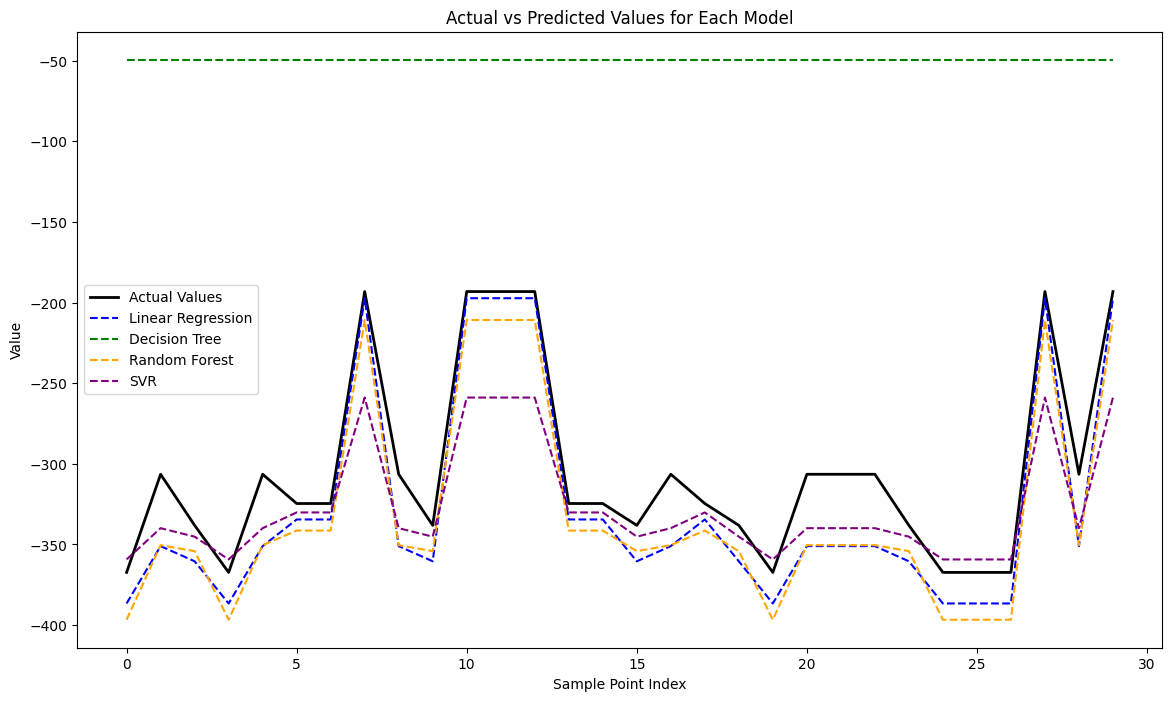

In [39]:
import matplotlib.pyplot as plt

# Assuming `y_test` are the actual labels and predictions are saved for each model
num_points = 30  # If you want to sample 10 points even if you have fewer data points
sample_indices = np.random.choice(len(some_labels), size=num_points, replace=True)


# Sampled actual values and predictions for each model
y_sample_actual = some_labels.iloc[sample_indices]
lin_pred_sample = lin_reg.predict(some_data_prepared[sample_indices])
tree_pred_sample = tree_reg.predict(some_data_prepared[sample_indices])
forest_pred_sample = forest_reg.predict(some_data_prepared[sample_indices])
svr_pred_sample = svr_model.predict(some_data_prepared[sample_indices])

# Plot actual vs predicted values as continuous lines
plt.figure(figsize=(14, 8))
plt.plot(y_sample_actual.values, label="Actual Values", color='black', linewidth=2)
plt.plot(lin_pred_sample, label="Linear Regression", color='blue', linestyle='--', linewidth=1.5)
plt.plot(tree_pred_sample, label="Decision Tree", color='green', linestyle='--', linewidth=1.5)
plt.plot(forest_pred_sample, label="Random Forest", color='orange', linestyle='--', linewidth=1.5)
plt.plot(svr_pred_sample, label="SVR", color='purple', linestyle='--', linewidth=1.5)

plt.xlabel("Sample Point Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values for Each Model")
plt.legend()
plt.show()


In [147]:
print("Features of the dataset:", train_set.columns.tolist())

Features of the dataset: ['s1', 's2', 's3', 's4', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Weight']


In [82]:
import pandas as pd

# Create the DataFrame with the specified values for each feature
data = {
    's1': [754.18],
    's2': [758.27],
    's3': [754.73],
    's4': [757.57],
    'AccX': [-215.82],
    'AccY': [-1025.88],
    'AccZ': [333.01],
    'GyroX': [0.34],
    'GyroY': [-34.50],
    'GyroZ': [-54.49],
    'SubFrame': [0],
    'Fx': [5.19443],
    'Fy': [-6.451870],
    'Fz': [-27.3241],
    'Mx': [3507.19],
    'My': [-6999.14],
    'Mz': [2351.19],
    'Cx': [-256.289],
    'Cy': [-128.3930],
    'Cz': [0],
    'Weight': [60]
}

# Convert to DataFrame
manual_input_df = pd.DataFrame(data)

# Preprocess the manual input using the same pipeline
manual_input_prepared = num_pipeline.transform(manual_input_df)

# Predict using the trained model
manual_prediction = svr_model.predict(manual_input_prepared)
print("Manual Prediction:", manual_prediction)


Manual Prediction: [-339.638793]


In [148]:
## duplicating the dataset
import numpy as np
train_set_triple = np.concatenate([train_set, train_set, train_set], axis=0)
triple_data_labels = np.concatenate([train_labels, train_labels, train_labels], axis =0)

In [149]:
triple_data_scaled = num_pipeline.fit_transform(train_set_triple)


In [150]:
triple_lin_reg = LinearRegression()
triple_lin_reg.fit(triple_data_scaled, triple_data_labels)

triple_tree_reg = DecisionTreeRegressor()
triple_tree_reg.fit(triple_data_scaled, triple_data_labels)

triple_forest_reg = RandomForestRegressor()
triple_forest_reg.fit(triple_data_scaled, triple_data_labels)


triple_svr_model = SVR(kernel='rbf')
triple_svr_model.fit(triple_data_scaled, triple_data_labels)

SVR()

In [151]:

# Predictions from each model
lin_reg_predictions = triple_lin_reg.predict(some_data_prepared)
tree_reg_predictions = triple_tree_reg.predict(some_data_prepared)
forest_reg_predictions = triple_forest_reg.predict(some_data_prepared)
svr_predictions = triple_svr_model.predict(some_data_prepared)

# Calculating MSE for each model
lin_reg_mse = mean_squared_error(some_labels, lin_reg_predictions)
tree_reg_mse = mean_squared_error(some_labels, tree_reg_predictions)
forest_reg_mse = mean_squared_error(some_labels, forest_reg_predictions)
svr_mse = mean_squared_error(some_labels, svr_predictions)

# Printing the predictions and MSE values for each model
print("Linear Regression Predictions:", lin_reg_predictions)
print("Decision Tree Predictions:", tree_reg_predictions)
print("Random Forest Predictions:", forest_reg_predictions)
print("SVR Predictions:", svr_predictions, "\n")

print("Linear Regression MSE:", lin_reg_mse)
print("Decision Tree MSE:", tree_reg_mse)
print("Random Forest MSE:", forest_reg_mse)
print("SVR MSE:", svr_mse, "\n")

# Print the actual values for comparison
print("Actual:", list(some_labels))

Linear Regression Predictions: [-310.69825398 -366.32015972 -349.2469726  -301.29135522 -302.265699  ]
Decision Tree Predictions: [-278.964 -397.814 -337.531 -269.999 -306.491]
Random Forest Predictions: [-314.21749 -395.03511 -340.34817 -277.50045 -280.15059]
SVR Predictions: [-331.11440368 -378.40102112 -346.9083828  -309.39465574 -305.73852557] 

Linear Regression MSE: 841.4684015831642
Decision Tree MSE: 1731.9424677999996
Random Forest MSE: 1157.883674158333
SVR MSE: 487.6584742963176 

Actual: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [152]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_lin_reg = r2_score(some_labels, lin_reg_predictions)
r2_tree_reg = r2_score(some_labels, tree_reg_predictions)
r2_forest_reg = r2_score(some_labels, forest_reg_predictions)
r2_svr = r2_score(some_labels, svr_predictions)

# Convert R-squared to accuracy percentage
accuracy_lin_reg = r2_lin_reg * 100
accuracy_tree_reg = r2_tree_reg * 100
accuracy_forest_reg = r2_forest_reg * 100
accuracy_svr = r2_svr * 100

# Print the accuracy percentages
print(f"Linear Regression Accuracy (R-squared): {accuracy_lin_reg:.2f}%")
print(f"Decision Tree Accuracy (R-squared): {accuracy_tree_reg:.2f}%")
print(f"Random Forest Accuracy (R-squared): {accuracy_forest_reg:.2f}%")
print(f"SVR Accuracy (R-squared): {accuracy_svr:.2f}%")


Linear Regression Accuracy (R-squared): 28.21%
Decision Tree Accuracy (R-squared): -47.75%
Random Forest Accuracy (R-squared): 1.22%
SVR Accuracy (R-squared): 58.40%
